In [1]:
import sys
sys.path.insert(0,'./')

In [2]:
from kappa_cl import *
from fisher import *

In [81]:
z=np.linspace(0,5,200)
pzs=lsst_zsource(z=z)
x=z<2
z=z[x]
pzs=pzs[x]

nbins=10
zs_bins=np.linspace(0.3,2,nbins+1)
zl_bins=np.linspace(0.3,1.8,nbins+1)
lmax_cl=2000
lmin_cl=2
l=np.arange(lmin_cl,lmax_cl)
#l_bins=np.int64(np.linspace(lmin_cl,lmax_cl,20))#
lmin_clB=20
lmax_clB=1800
l_bins=np.int64(np.logspace(np.log10(lmin_clB),np.log10(lmax_clB),20))
do_cov=True
bin_cl=True

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)
stack_data=False


In [42]:
import kappa_cl
reload(kappa_cl)
from kappa_cl import *

In [52]:
kappa0=Kappa(zs={0:[1]},pzs={0:[1]},lens_weight=False,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,
               stack_data=stack_data,SSV_cov=True,tidal_SSV_cov=True,ns=26,f_sky=0.35)

('changed kmax to', 8267.1812952697346, ' to cover rmin')
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 3000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 4000)
('pruning r, log_space,n_f:', True, 2)
('pruned r:', 73)
('nr:', 73)


In [53]:
cl0=kappa0.kappa_cl_tomo()

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


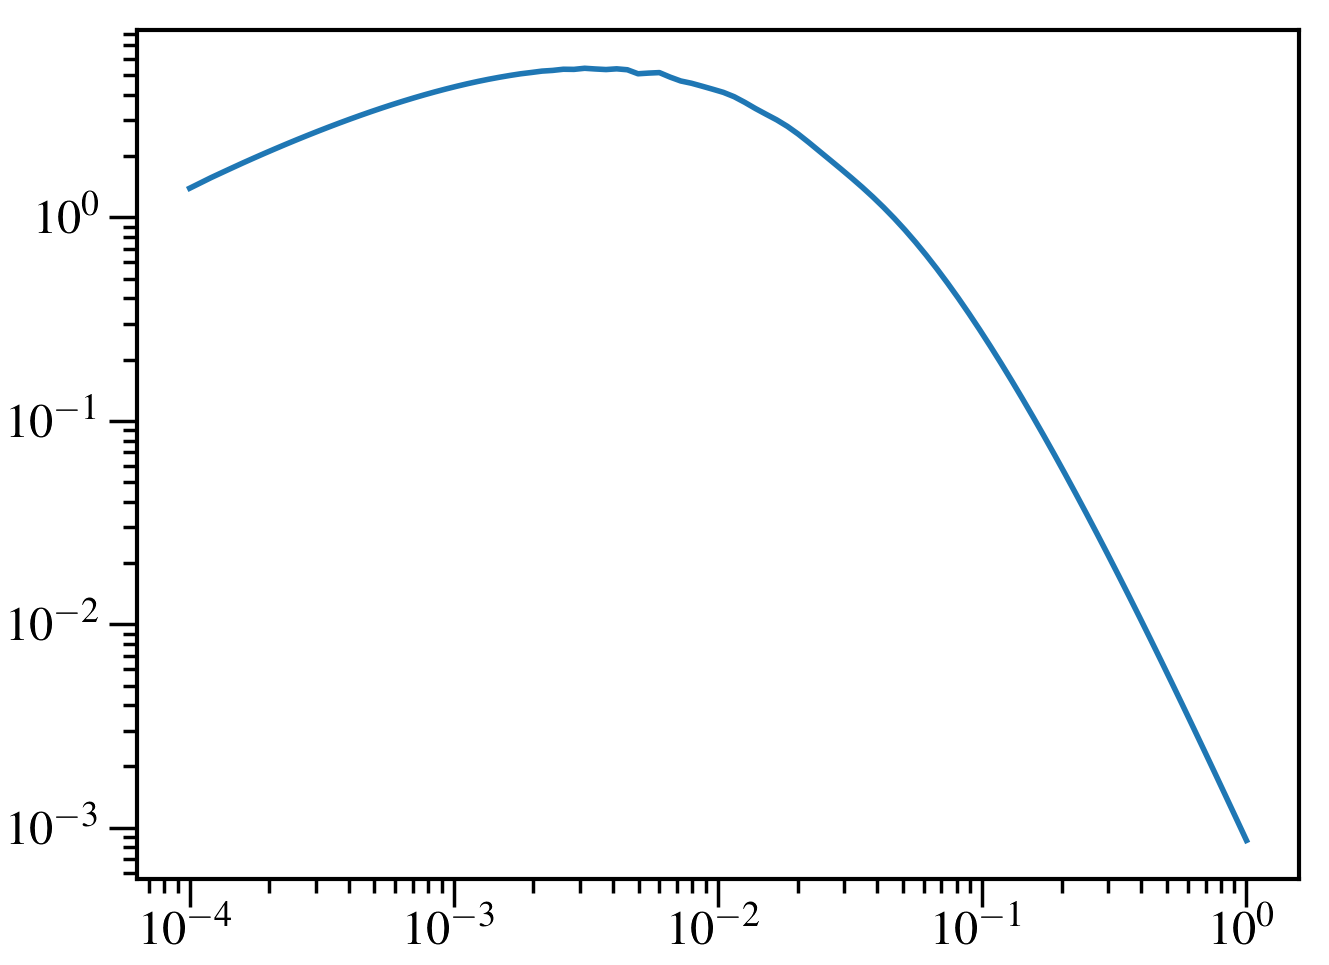

In [54]:
plot(kappa0.zl,kappa0.sigma_win)
xscale('log')
yscale('log')

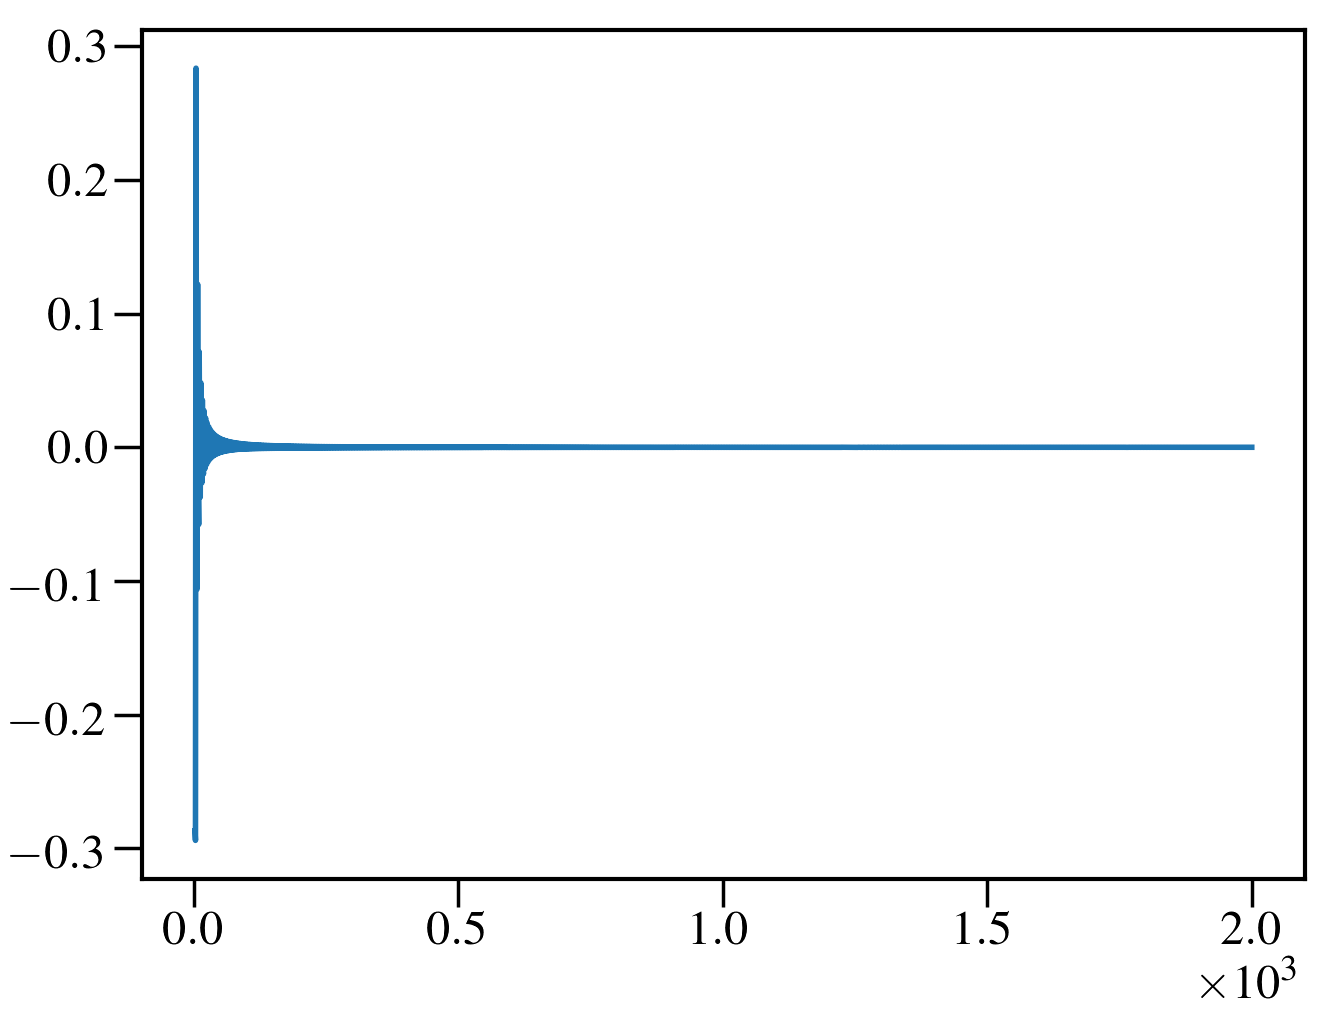

In [55]:
plot(lb,kappa0.Win)

(10, 3000)

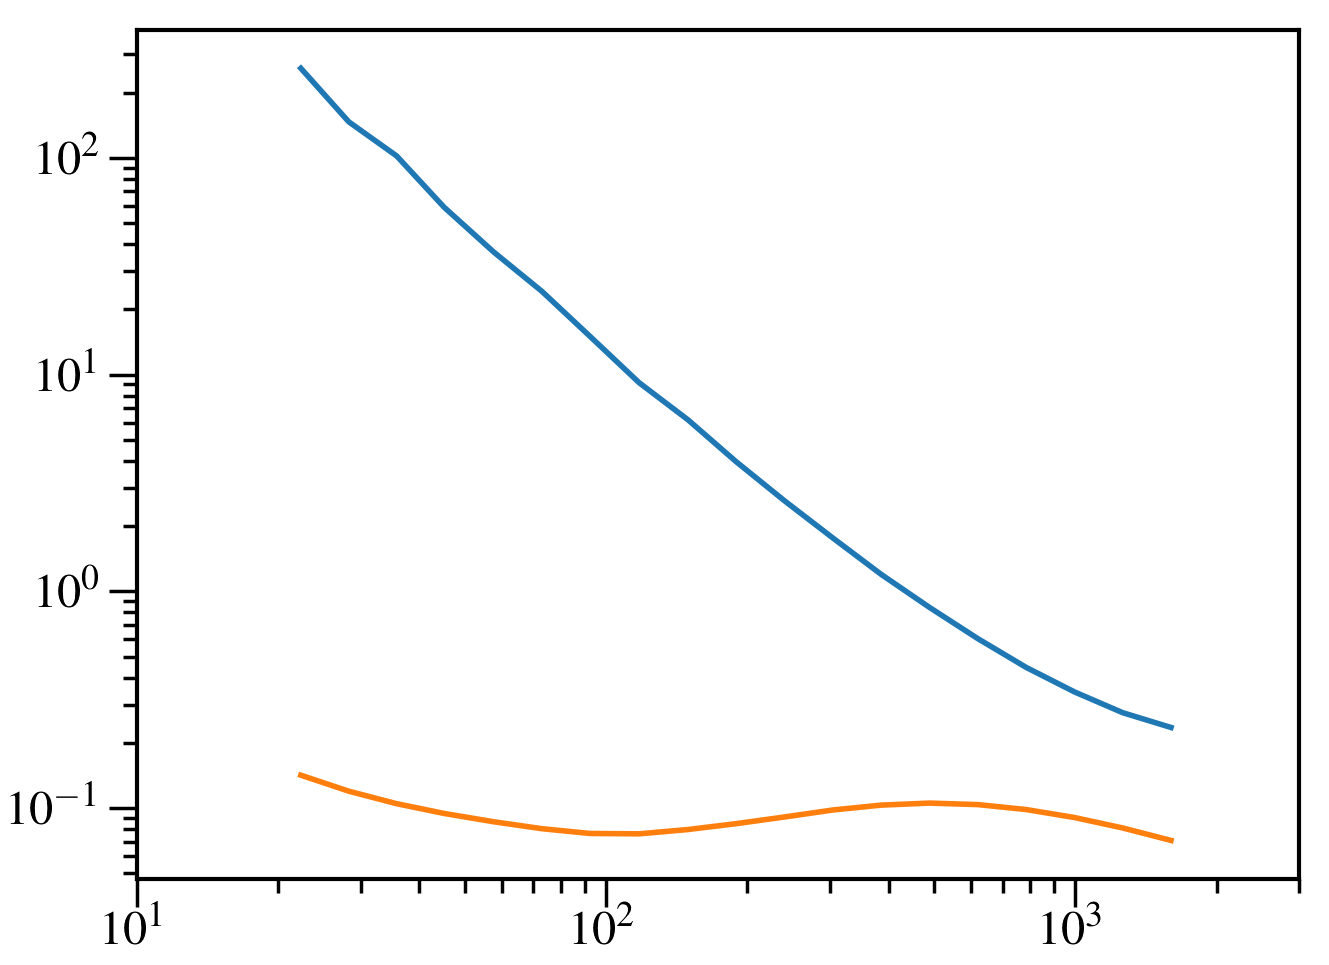

In [56]:
#cov0=clS['cov'][(0,0,0,0)]
f=1.e4
cl00=cl0
cov0=cl00['cov'][(0,0,0,0)]
cl_t=cl00['cl'][:,0,0]
lb=cl00['l']
plot(lb,np.diag(cov0['G'])/cl_t**2*f)
plot(lb,np.diag(cov0['SSC_dd'])/cl_t**2*f)
xscale('log')
yscale('log')
xlim(10,3000)

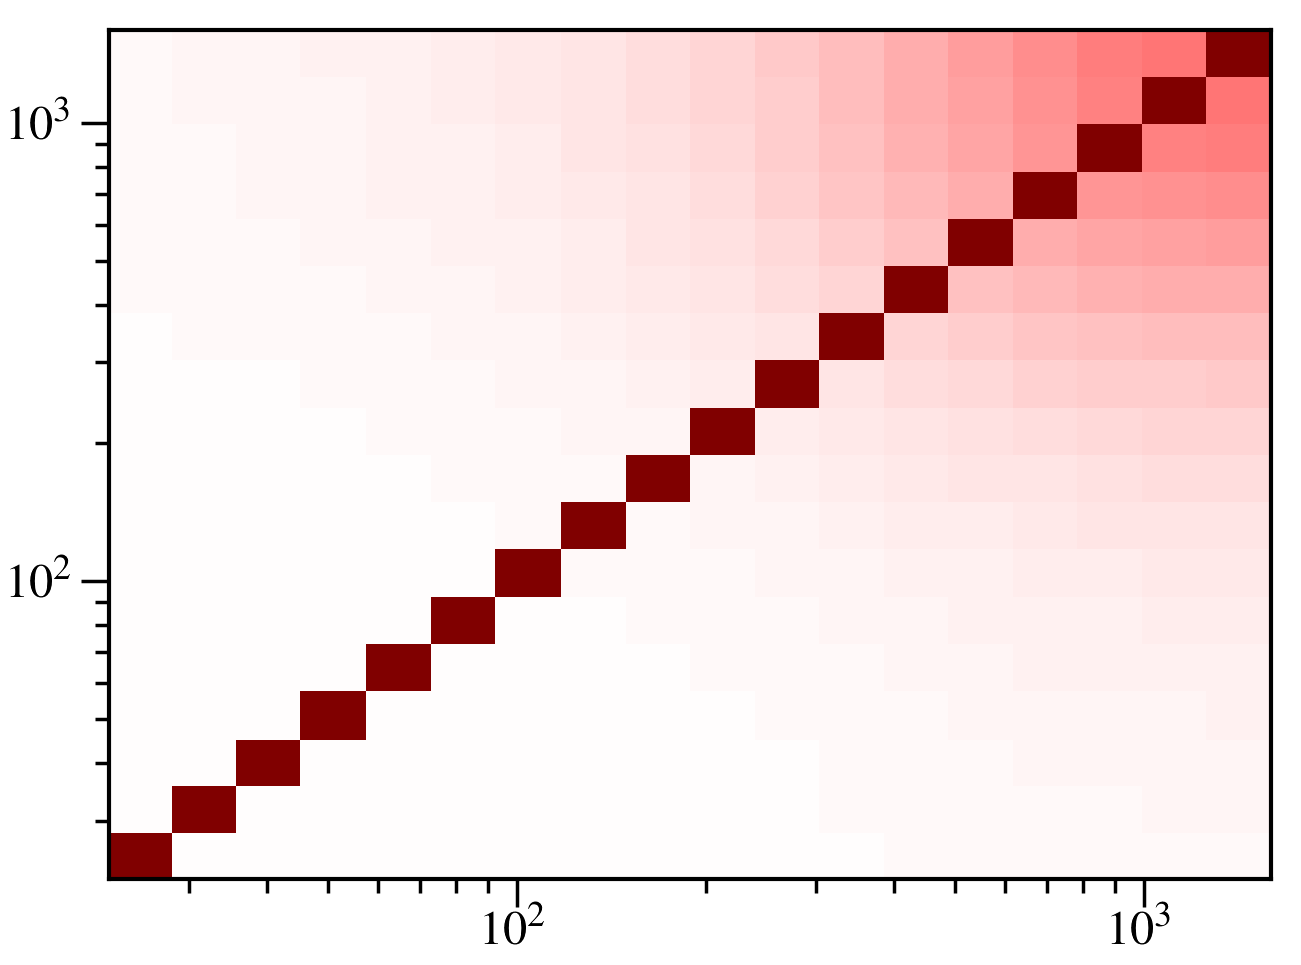

In [57]:
cov0=cl00['cov'][(0,0,0,0)]
corr2=cc.corr_matrix(cov0['final'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

In [82]:
kappaS = Kappa(zs=z,pzs=pzs,l=l,z_bins=zs_bins,lens_weight=False,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,
               stack_data=stack_data,SSV_cov=True,tidal_SSV_cov=True,ns=26)#ns=np.inf)

kappaL = Kappa(zs=z,pzs=pzs,l=l,z_bins=zl_bins,lens_weight=True,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,
               stack_data=stack_data,SSV_cov=True,tidal_SSV_cov=True,ns=26)#ns=np.inf)

('changed kmax to', 8267.1812952697346, ' to cover rmin')
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 3000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 4000)
('pruning r, log_space,n_f:', True, 2)
('pruned r:', 73)
('nr:', 73)
('changed kmax to', 8267.1812952697346, ' to cover rmin')
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 3000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 4000)
('pruning r, log_space,n_f:', True, 2)
('pruned r:', 73)
('nr:', 73)


In [ ]:
%time clS=kappaS.kappa_cl_tomo()
clL=kappaL.kappa_cl_tomo()
clSb=clS#['binned']
clLb=clL#['binned']
#lb=clS['binned']['l']
# l=clS['l']

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


In [ ]:
plot(clS['l'],clS['cl'][:,0,0])
#plot(clSb['l'],clSb['cl'][:,0,0])

plot(clL['l'],clL['cl'][:,0,0],ls='--')
# plot(clLb['l'],clLb['cl'][:,0,0])
xscale('log')
yscale('log')

In [ ]:
cl_b_stack=kappaS.stack_dat(clS)
cl_Lb_stack=kappaS.stack_dat(clL)
#clstack=kappaS.stack_dat(clS)

In [ ]:
covS_inv=np.linalg.inv(cl_b_stack['cov'])
print np.sqrt(np.dot(cl_b_stack['cl'],np.dot(covS_inv,cl_b_stack['cl'])))
covL_inv=np.linalg.inv(cl_Lb_stack['cov'])
print np.sqrt(np.dot(cl_Lb_stack['cl'],np.dot(covL_inv,cl_Lb_stack['cl'])))

In [70]:
covS_inv=np.linalg.inv(cl_b_stack['cov'])
print np.sqrt(np.dot(cl_b_stack['cl'],np.dot(covS_inv,cl_b_stack['cl'])))
covL_inv=np.linalg.inv(cl_Lb_stack['cov'])
print np.sqrt(np.dot(cl_Lb_stack['cl'],np.dot(covL_inv,cl_Lb_stack['cl'])))

252.475775042
313.510292027


In [ ]:
corr=cc.corr_matrix(cl_b_stack['cov'])
corrL=cc.corr_matrix(cl_Lb_stack['cov'])

In [ ]:
pcolor(corr,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
pcolor(corrL,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
#cov0=clS['cov'][(0,0,0,0)]
f=1.e4
cl00=clSb
cl01=clS
cov0=cl00['cov'][(0,0,0,0)]
cov01=cl01['cov'][(0,0,0,0)]
cl_t=cl00['cl'][:,0,0]
cl_t1=cl01['cl'][:,0,0]
plot(lb,np.diag(cov0['G'])/cl_t**2*f)
plot(lb,np.diag(cov0['SSC_dd'])/cl_t**2*f)
# plot(l,np.diag(cov01['G'])/cl_t1**2*f)
# plot(l,np.diag(cov01['SSC_dd'])/cl_t1**2*f)
xscale('log')
yscale('log')
xlim(10,3000)

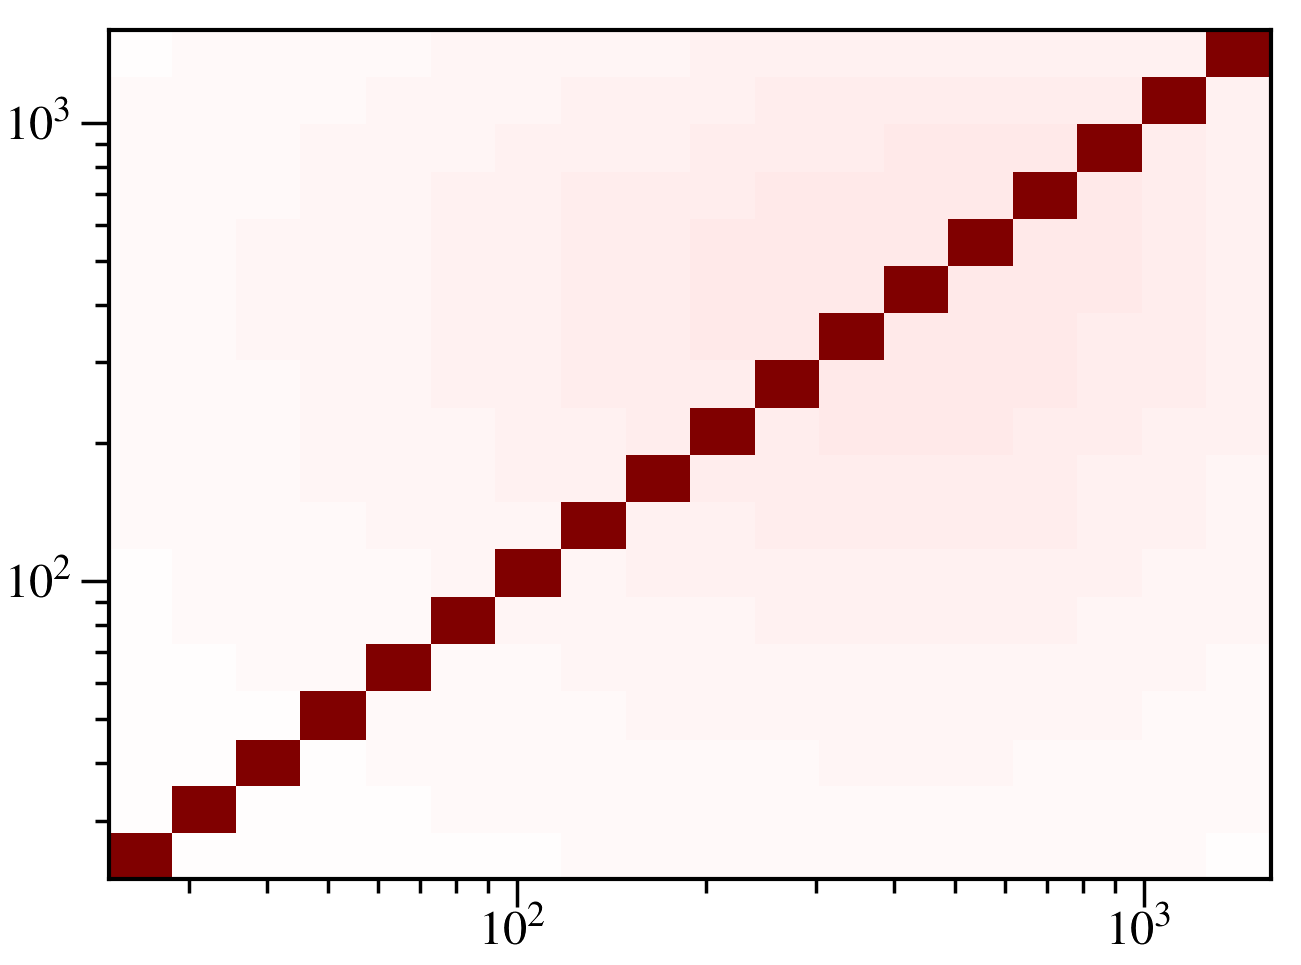

In [76]:
corr2=cc.corr_matrix(cov0['final'])
pcolor(lb,lb,corr2,vmin=-1,vmax=1,cmap='seismic')
xscale('log')
yscale('log')

(10, 3000)

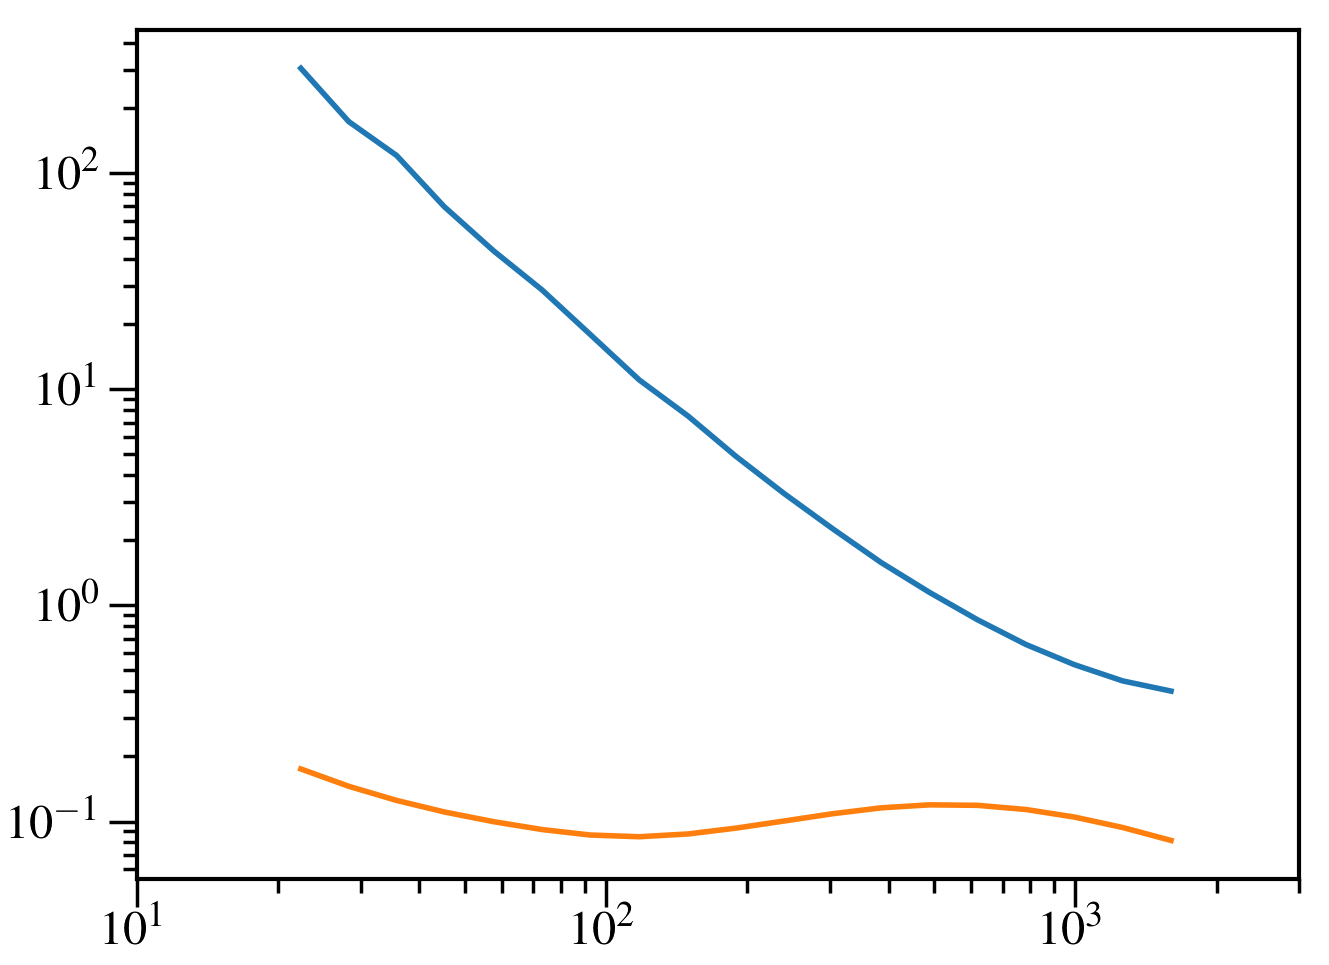

In [80]:
#cov0=clS['cov'][(0,0,0,0)]
f=1.e4
cl00=clLb
cl01=clL
cov0=cl00['cov'][(0,0,0,0)]
cov01=cl01['cov'][(0,0,0,0)]
cl_t=cl00['cl'][:,0,0]
cl_t1=cl01['cl'][:,0,0]
plot(lb,np.diag(cov0['G'])/cl_t**2*f)
plot(lb,np.diag(cov0['SSC_dd'])/cl_t**2*f)
# plot(l,np.diag(cov01['G'])/cl_t1**2*f)
# plot(l,np.diag(cov01['SSC_dd'])/cl_t1**2*f)
xscale('log')
yscale('log')
xlim(10,3000)

In [ ]:
cov0['G']